- Gabriel Quiroz 19255
- Jose Pablo Ponce 19092

In [1]:
#Importar las librerías

import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn import feature_extraction, tree, model_selection, metrics
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from yellowbrick.features import Rank2D
from yellowbrick.features import RadViz

## Parte 1 – Ingeniería de características


### Exploración de datos

1. Cargue el dataset en un dataframe de pandas, muestre un ejemplo de cinco observaciones.


In [2]:
## Cargar el dataset proporcionado
df = pd.read_csv('dataset_pishing.csv')
print(df.shape)
pd.set_option('display.max_columns', None)
df.sample(n=5).head() 

(11430, 67)


,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
3806,http://m.hf502.com/,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,2,0,1,1,0,5,5,0,3.000000,3.0,0.0,0,0,0,0,0,0,45,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,1,1,0,307,1154,0,0,0,0,phishing
3800,http://gameplaylabs.com/newuser/fabbc6a1c5734e...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,3,5,7,12,7,32,12,32,17.000000,12.0,19.5,0,0,0,0,0,0,146,0.267123,0.732877,0,2,0,0.028037,0,0.000000,1,1,4.761905,0,0.000000,100.000000,0,0,0,26.923077,0,0,0,1,1,0,95,3557,0,0,1,1,phishing
7081,http://www.d3wheels.com/,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,4,3,3,0,8,8,0,5.500000,5.5,0.0,0,0,0,0,0,0,1,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,182,184,0,0,0,2,legitimate
9585,http://photos.toofab.com/galleries/mickey_mous...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,3,0,9,2,3,6,3,9,6,9,5.222222,6.0,5.0,0,0,0,0,0,0,37,0.081081,0.918919,0,1,0,0.352941,0,0.205882,0,1,0.000000,0,0.000000,100.000000,0,0,0,9.090909,0,0,0,1,1,0,425,6149,11846,0,1,5,legitimate
529,http://tekyteach.blogspot.com,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,2,0,8,8,0,9,9,0,8.500000,8.5,0.0,0,1,0,0,0,0,148,0.243243,0.756757,0,3,0,0.428571,0,0.017857,1,1,12.500000,0,1.923077,98.076923,0,0,0,36.111111,0,0,0,1,0,0,373,7296,0,0,0,5,legitimate


2. Muestre la cantidad de observaciones etiquetadas en la columna status como “legit” y como
“pishing”. ¿Está balanceado el dataset?

In [3]:
print('legitimate:', len(df[df['status']=='legitimate']))
print('phising:', len(df[df['status']=='phishing']))

legitimate: 5715
phising: 5715


Como se puede observar hay la misma cantidad de observaciones tanto para "legitimate" y "phising", por ende se puede afirmar que el dataset esta balanceado

### Derivación de características


En base al artículo “Towards Benchmark Datasets for ML Based Wensite Phishing Detection: An
Experimental Study”, derivar las características basadas en el dominio: f1, f2, f4 – f20, f25, f26 y f27.

In [4]:
from urllib.parse import urlparse
def get_hostname(url):
    o = urlparse(url)
    return o.hostname
    
df['hostname'] = df['url'].apply(get_hostname)


In [5]:
#f1
df['f1'] = df['url'].str.len()


In [6]:

#f2
df['f2'] = df['hostname'].str.len()


In [7]:
#f4
df['f4'] = df['url'].str.count('\\.')

#f5
df['f5'] = df['url'].str.count('\\-')

#f6
df['f6'] = df['url'].str.count('\\@')

#f7
df['f7'] = df['url'].str.count('\\?')

#f8
df['f8'] = df['url'].str.count('\\&')

#f9
df['f9'] = df['url'].str.count('\\|')

#f10
df['f10'] = df['url'].str.count('\\=')

#f11
df['f11'] = df['url'].str.count('\\_')

#f12
df['f12'] = df['url'].str.count('\\˜')

#f13
df['f13'] = df['url'].str.count('\\%')

#f14
df['f14'] = df['url'].str.count('\\/')

#f15
df['f15'] = df['url'].str.count('\\*')

#f16
df['f16'] = df['url'].str.count('\\:')

#f17
df['f17'] = df['url'].str.count('\\,')

#f18
df['f18'] = df['url'].str.count('\\;')

#f19
df['f19'] = df['url'].str.count('\\$')

#f20
df['f20'] = df['url'].str.count('\\%20')


In [8]:
#f25
df['f25'] = df['url'].str.startswith('https')
df["f25"] = df["f25"].astype(int)


In [9]:
#f26
def count_digits(url):
    digits = sum(c.isdigit() for c in url)
    url_len = len(url)
    return digits / url_len

df["f26"] = df["url"].apply(count_digits)

In [10]:
#f27
df["f27"] = df["hostname"].apply(count_digits)

In [11]:
df.sample(n=5).head() 

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,hostname,f1,f2,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f25,f26,f27
11020,http://www.lilpeep.party/,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,2,4,3,3,0,7,7,0,5.000000,5.0,0.000000,0,0,0,0,1,0,20,0.050000,0.950000,0,0,0,0.157895,0,0.105263,0,1,0.000000,0,0.000000,100.000000,0,0,0,16.666667,0,0,0,1,0,0,150,-1,1923382,0,0,4,legitimate,www.lilpeep.party,25,17,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0.0,0.0
1008,http://www.astroamerica.com/nodes.html,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,4,3,3,3,4,12,12,5,6.000000,7.5,4.500000,0,0,0,0,0,0,64,0.984375,0.015625,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,100.000000,0.000000,0,0,0,93.750000,0,0,0,1,0,0,250,-1,6084468,0,0,3,legitimate,www.astroamerica.com,38,20,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0.0,0.0
10522,https://www.boxol.it/,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,5,5,0,4.000000,4.0,0.000000,0,0,0,0,0,0,118,0.245763,0.754237,0,4,0,0.000000,0,0.000000,0,1,0.000000,0,0.000000,100.000000,0,0,0,40.000000,0,0,0,0,0,0,102,6515,0,0,0,4,legitimate,www.boxol.it,21,12,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0.0,0.0
3866,https://buduzdorov.narod.ru/,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,2,0,5,5,0,10,10,0,7.500000,7.5,0.000000,0,0,0,0,0,0,20,0.500000,0.500000,0,0,0,0.100000,0,0.100000,0,0,100.000000,0,50.000000,50.000000,0,0,0,0.000000,0,0,0,1,1,0,162,7531,0,0,0,5,phishing,buduzdorov.narod.ru,28,19,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0.0,0.0
6367,http://www.imore.com/how-to-permanently-delete...,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,9,4,2,3,2,11,5,11,5.444444,4.0,5.857143,0,0,0,0,0,0,137,0.700730,0.299270,0,0,0,0.146341,0,0.439024,0,0,94.117647,0,33.333333,66.666667,0,0,0,10.256410,0,0,0,0,1,0,1154,7611,3706,0,0,7,legitimate,www.imore.com,68,13,2,6,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0.0,0.0


### Preprocesamiento

Realice las modificaciones necesarias para convertir la variable categórica status a una variable
binaria. Elimine la columna del dominio.

In [12]:
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})


In [13]:
df = df.drop(['hostname', 'url'], axis=1)

### Visualización de resultados


Genere un reporte de perfil con la librería pandas_profiling. Analice el reporte y determine las
columnas que son constantes, o que no tienen una varianza alta con la columna status. Almacene su
reporte como una página html.

In [14]:
from pandas_profiling import ProfileReport

/home/gabriel/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_3213/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [21]:
prof = ProfileReport(df)
prof.to_file(output_file='reporte.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


### Selección de Características


En base al análisis del reporte, elimine las características repetidas o irrelevantes para la clasificación
de un sitio de pishing. Verifique que no posee observaciones repetidas.

In [14]:
df = df.drop(['domain_registration_length', 'sfh', 'submit_email', 'ratio_extErrors', 'ratio_intErrors','ratio_extRedirection', 'ratio_intRedirection', 'ratio_nullHyperlinks', 'nb_redirection', 'f9', 'f12', ], axis=1)

In [15]:
print('Duplicados antes de limpieza', df.duplicated().sum())
df = df.drop_duplicates()
print('Duplicados luego de limpieza', df.duplicated().sum())


Duplicados antes de limpieza 204
Duplicados luego de limpieza 0


## Parte 2 – Implementación


### Separación de datos


- Datos de entrenamiento: 55%
- Datos de validación: 15%
- Datos de prueba: 30%
- Almacene cada dataset como un archivo .csv

In [16]:
target = df['status']
df_final = df.drop(['status'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
train_ratio = 0.55
validation_ratio = 0.15
test_ratio = 0.30

# train is now 55% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(df_final, target, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [20]:
x_train.count()

ip              6174
nb_www          6174
nb_com          6174
nb_dslash       6174
http_in_path    6174
                ... 
f19             6174
f20             6174
f25             6174
f26             6174
f27             6174
Length: 76, dtype: int64

In [21]:
x_test.count()

ip              3369
nb_www          3369
nb_com          3369
nb_dslash       3369
http_in_path    3369
                ... 
f19             3369
f20             3369
f25             3369
f26             3369
f27             3369
Length: 76, dtype: int64

In [22]:
y_train.head()

9444     0
3630     1
5309     1
11224    0
3375     1
Name: status, dtype: int64

In [23]:
y_train.value_counts()

0    3138
1    3036
Name: status, dtype: int64

In [24]:
y_val.value_counts()

1    842
0    841
Name: status, dtype: int64

### Implementación

Utilice dos algoritmos de Machine Learning para entrenar el modelo. Muestre y explique los valores
obtenidos de las siguientes métricas para los datos de validación y pruebas, para cada modelo, en
base al contexto del problema (detección de Pishing).

## Decision Tree Classifier

- Matriz de confusión
- Precision
- Recall
- F1 Score

## FALTA EXPLICACION DE METRICAS OBTENIDAS PARA VALIDACION Y PRUEBAS

## Validacion

In [25]:
clf = tree.DecisionTreeClassifier()  # clf means classifier
clf = clf.fit(x_train, y_train)

# Make the prediction
pred = clf.predict(x_val)

In [26]:
print('Confusion Matrix\n', metrics.confusion_matrix(y_val, pred))

Confusion Matrix
 [[789  52]
 [ 53 789]]


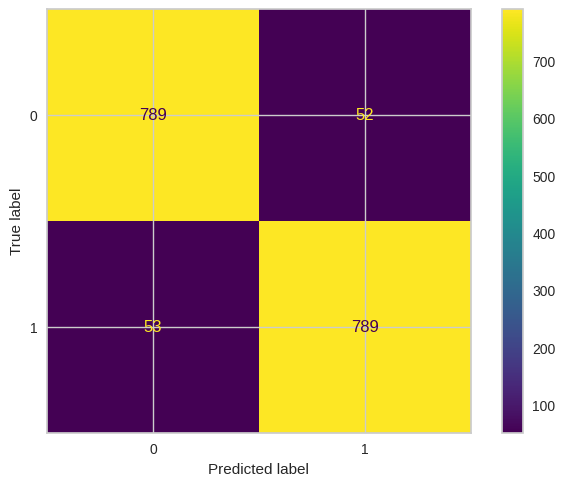

In [27]:
labels = np.unique(y_val)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_val, pred, labels=labels))
cm_display.plot()
plt.show()

In [28]:
print(metrics.classification_report(y_val, pred, target_names=['legit', 'pishing']))

              precision    recall  f1-score   support

       legit       0.94      0.94      0.94       841
     pishing       0.94      0.94      0.94       842

    accuracy                           0.94      1683
   macro avg       0.94      0.94      0.94      1683
weighted avg       0.94      0.94      0.94      1683



## Pruebas

In [29]:
pred = clf.predict(x_test)

In [30]:
print('Confusion Matrix\n', metrics.confusion_matrix(y_test, pred))

Confusion Matrix
 [[1608  128]
 [ 132 1501]]


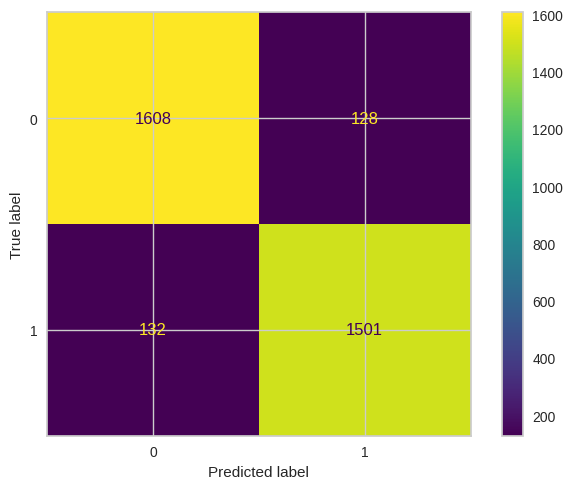

In [31]:
labels = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, pred, labels=labels))
cm_display.plot()
plt.show()

In [32]:
print(metrics.classification_report(y_test, pred, target_names=['legit', 'pishing']))

              precision    recall  f1-score   support

       legit       0.92      0.93      0.93      1736
     pishing       0.92      0.92      0.92      1633

    accuracy                           0.92      3369
   macro avg       0.92      0.92      0.92      3369
weighted avg       0.92      0.92      0.92      3369



## ALGORITMO 2

## Random Forest Classifier

In [19]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [20]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [21]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = clf.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score

In [32]:
print('Confusion Matrix\n', metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix
 [[1625   59]
 [  70 1615]]


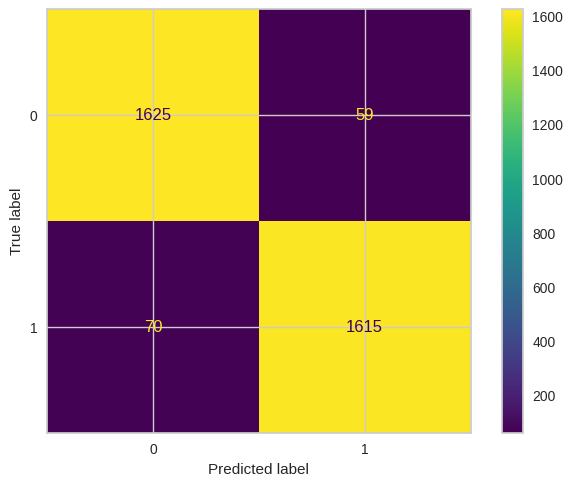

In [33]:
labels = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=labels))
cm_display.plot()
plt.show()

In [34]:
print(metrics.classification_report(y_test, y_pred, target_names=['legit', 'pishing']))

              precision    recall  f1-score   support

       legit       0.96      0.96      0.96      1684
     pishing       0.96      0.96      0.96      1685

    accuracy                           0.96      3369
   macro avg       0.96      0.96      0.96      3369
weighted avg       0.96      0.96      0.96      3369



Discusión
1. ¿Cuál es el impacto de clasificar un sitio legítimo como Pishing?'
- El impacto es que si un sitio legitimo es clasificado como Phishing el sitio va a quedar limitado en cuanto a su trafico debido a que no va a ser recomendado por los navegadores para ingresar en el.

2. ¿Cuál es el impacto de clasificar un sitio de Pishing como legítimo?
- El impacto es que es mucho mas facil que una persona confie en el sitio y caiga en la trampa del atacante.

3. En base a las respuestas anteriores, ¿Qué métrica elegiría para comparar modelos similares
de clasificación de pishing?
- Consideramos que la metrica f1-score es la mejor para comparar ambos modelos ya que es una métrica que tiene en cuenta tanto la precisión como el recall

4. ¿Qué modelo es mejor para la clasificación de Pishing? Justifique
- Es mejor el Random Forest Classifier ya que cuenta con mejores metricas, incluida el f1-score el cual fue de 96 contra 92 del otro modelo. Esto hace sentido ya que el Random FOrest Classifier mejora el Decision Tree Clasifier.

5. En base a las métricas obtenidas ¿es necesaria la intervención de una persona humana para
tomar la decisión final?
- Dado que las metricas obtenidas son cercanas a 1, no es necesaria la intervencion humana.